Left mouse button gives  5000 iterates, right is new window
Press stop button to quit altogether


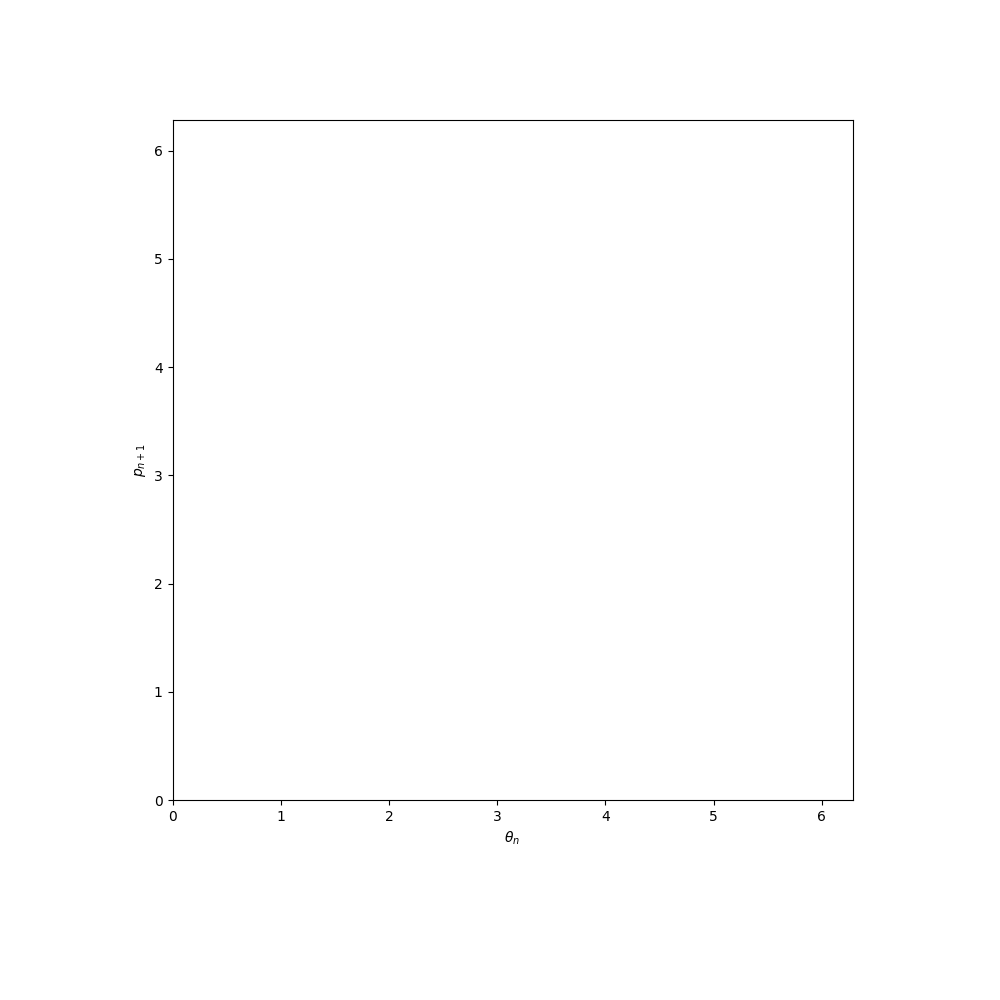

Initial point: 3.569865638002137 2.597593437415348
Initial point: 1.8327497001348396 2.4127938695571247
Initial point: 4.641703131579831 0.9805972186558953
Initial point: 4.5123434340790745 2.800872962059393
Initial point: 2.4425882740669764 2.625313372594081
Initial point: 1.4446706076325713 2.7177131565231925
Initial point: 2.821427388176333 2.5883534590224366
Initial point: 4.900422526581345 2.1633144529485238
Initial point: 5.0020622889033675 1.9877548634832116
Initial point: 3.597585573180871 1.2577965704432301
Initial point: 3.070906804784935 1.1469168297282966
Initial point: 2.655107777103933 0.9436373050842508
Initial point: 2.627387841925199 0.9343973266913397
Initial point: 2.6458677987110213 0.9159173699055174
Initial point: 3.0062269560345567 0.6479579965110938
Initial point: 3.043186869606201 0.5185982990103375
Initial point: 2.4610682308527987 1.2023567000857633
Initial point: 2.433348295674065 1.4610760950872759
Initial point: 2.387148403709509 1.9045950579470114
Initial

In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

def standard():
    K = float(input('Give K = ') or 4)

    niter = 5000
    print('Left mouse button gives %5d iterates, right is new window' % niter)
    print('Press stop button to quit altogether')

    theta_min, theta_max = 0, 2 * np.pi
    p_min, p_max = 0, 2 * np.pi

    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplots_adjust(bottom=0.2)
    ax.set_xlim(theta_min, theta_max)
    ax.set_ylim(p_min, p_max)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r'$\theta_n$')
    ax.set_ylabel(r'$p_{n+1}$')

    def stop(event):
        plt.close(fig)

    # stop_button_ax = plt.axes([0.81, 0.05, 0.1, 0.075])
    # stop_button = Button(stop_button_ax, 'Stop')
    # stop_button.on_clicked(stop)

    def onclick(event):
        nonlocal theta_min, theta_max, p_min, p_max
        if event.button == 1:  # Left click
            print('Initial point:', event.xdata, event.ydata)
            iterate_plot(event.xdata, event.ydata, K, niter, ax)
        elif event.button == 3:  # Right click
            theta_min, theta_max = sorted([theta_min, event.xdata])
            p_min, p_max = sorted([p_min, event.ydata])
            ax.set_xlim(theta_min, theta_max)
            ax.set_ylim(p_min, p_max)
            fig.canvas.draw_idle()

    def iterate_plot(theta_0, p_0, K, niter, ax):
        twopi = 2 * np.pi
        theta = np.zeros(niter)
        p = np.zeros(niter)

        for n in range(niter):
            theta_1 = (theta_0 + p_0) % twopi
            p_1 = (p_0 + K * np.sin(theta_1)) % twopi
            theta[n], p[n] = theta_1, p_1
            theta_0, p_0 = theta_1, p_1

        ax.plot(theta, p, '.', color='#8B0000', markersize=1)
        fig.canvas.draw_idle()

    fig.canvas.mpl_connect('button_press_event', onclick)

standard()
